In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Softmax, Dropout, Flatten
from tensorflow.keras.initializers import zeros, TruncatedNormal
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import random as r
import pydot
import graphviz

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
train = pd.read_csv("train.csv")
data = train.sample(frac=1).reset_index(drop=True)
split = int(len(train)*(0.7))
data_train = data[:split]
data_val = data[split:]


In [18]:
def vectorize(data,label=False):
    for l, v in data.iterrows():
        start = 1 if label else 0
        ar = v.as_matrix()[start:]
        yield np.reshape(np.array(ar),(28,28,1))
def onehot(num):
        x = np.zeros(10)
        x[num]=1.0
        return x
def labels(data):
        for l, v in data.iterrows():
                yield onehot(v[0])


/usr/lib/python3/dist-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


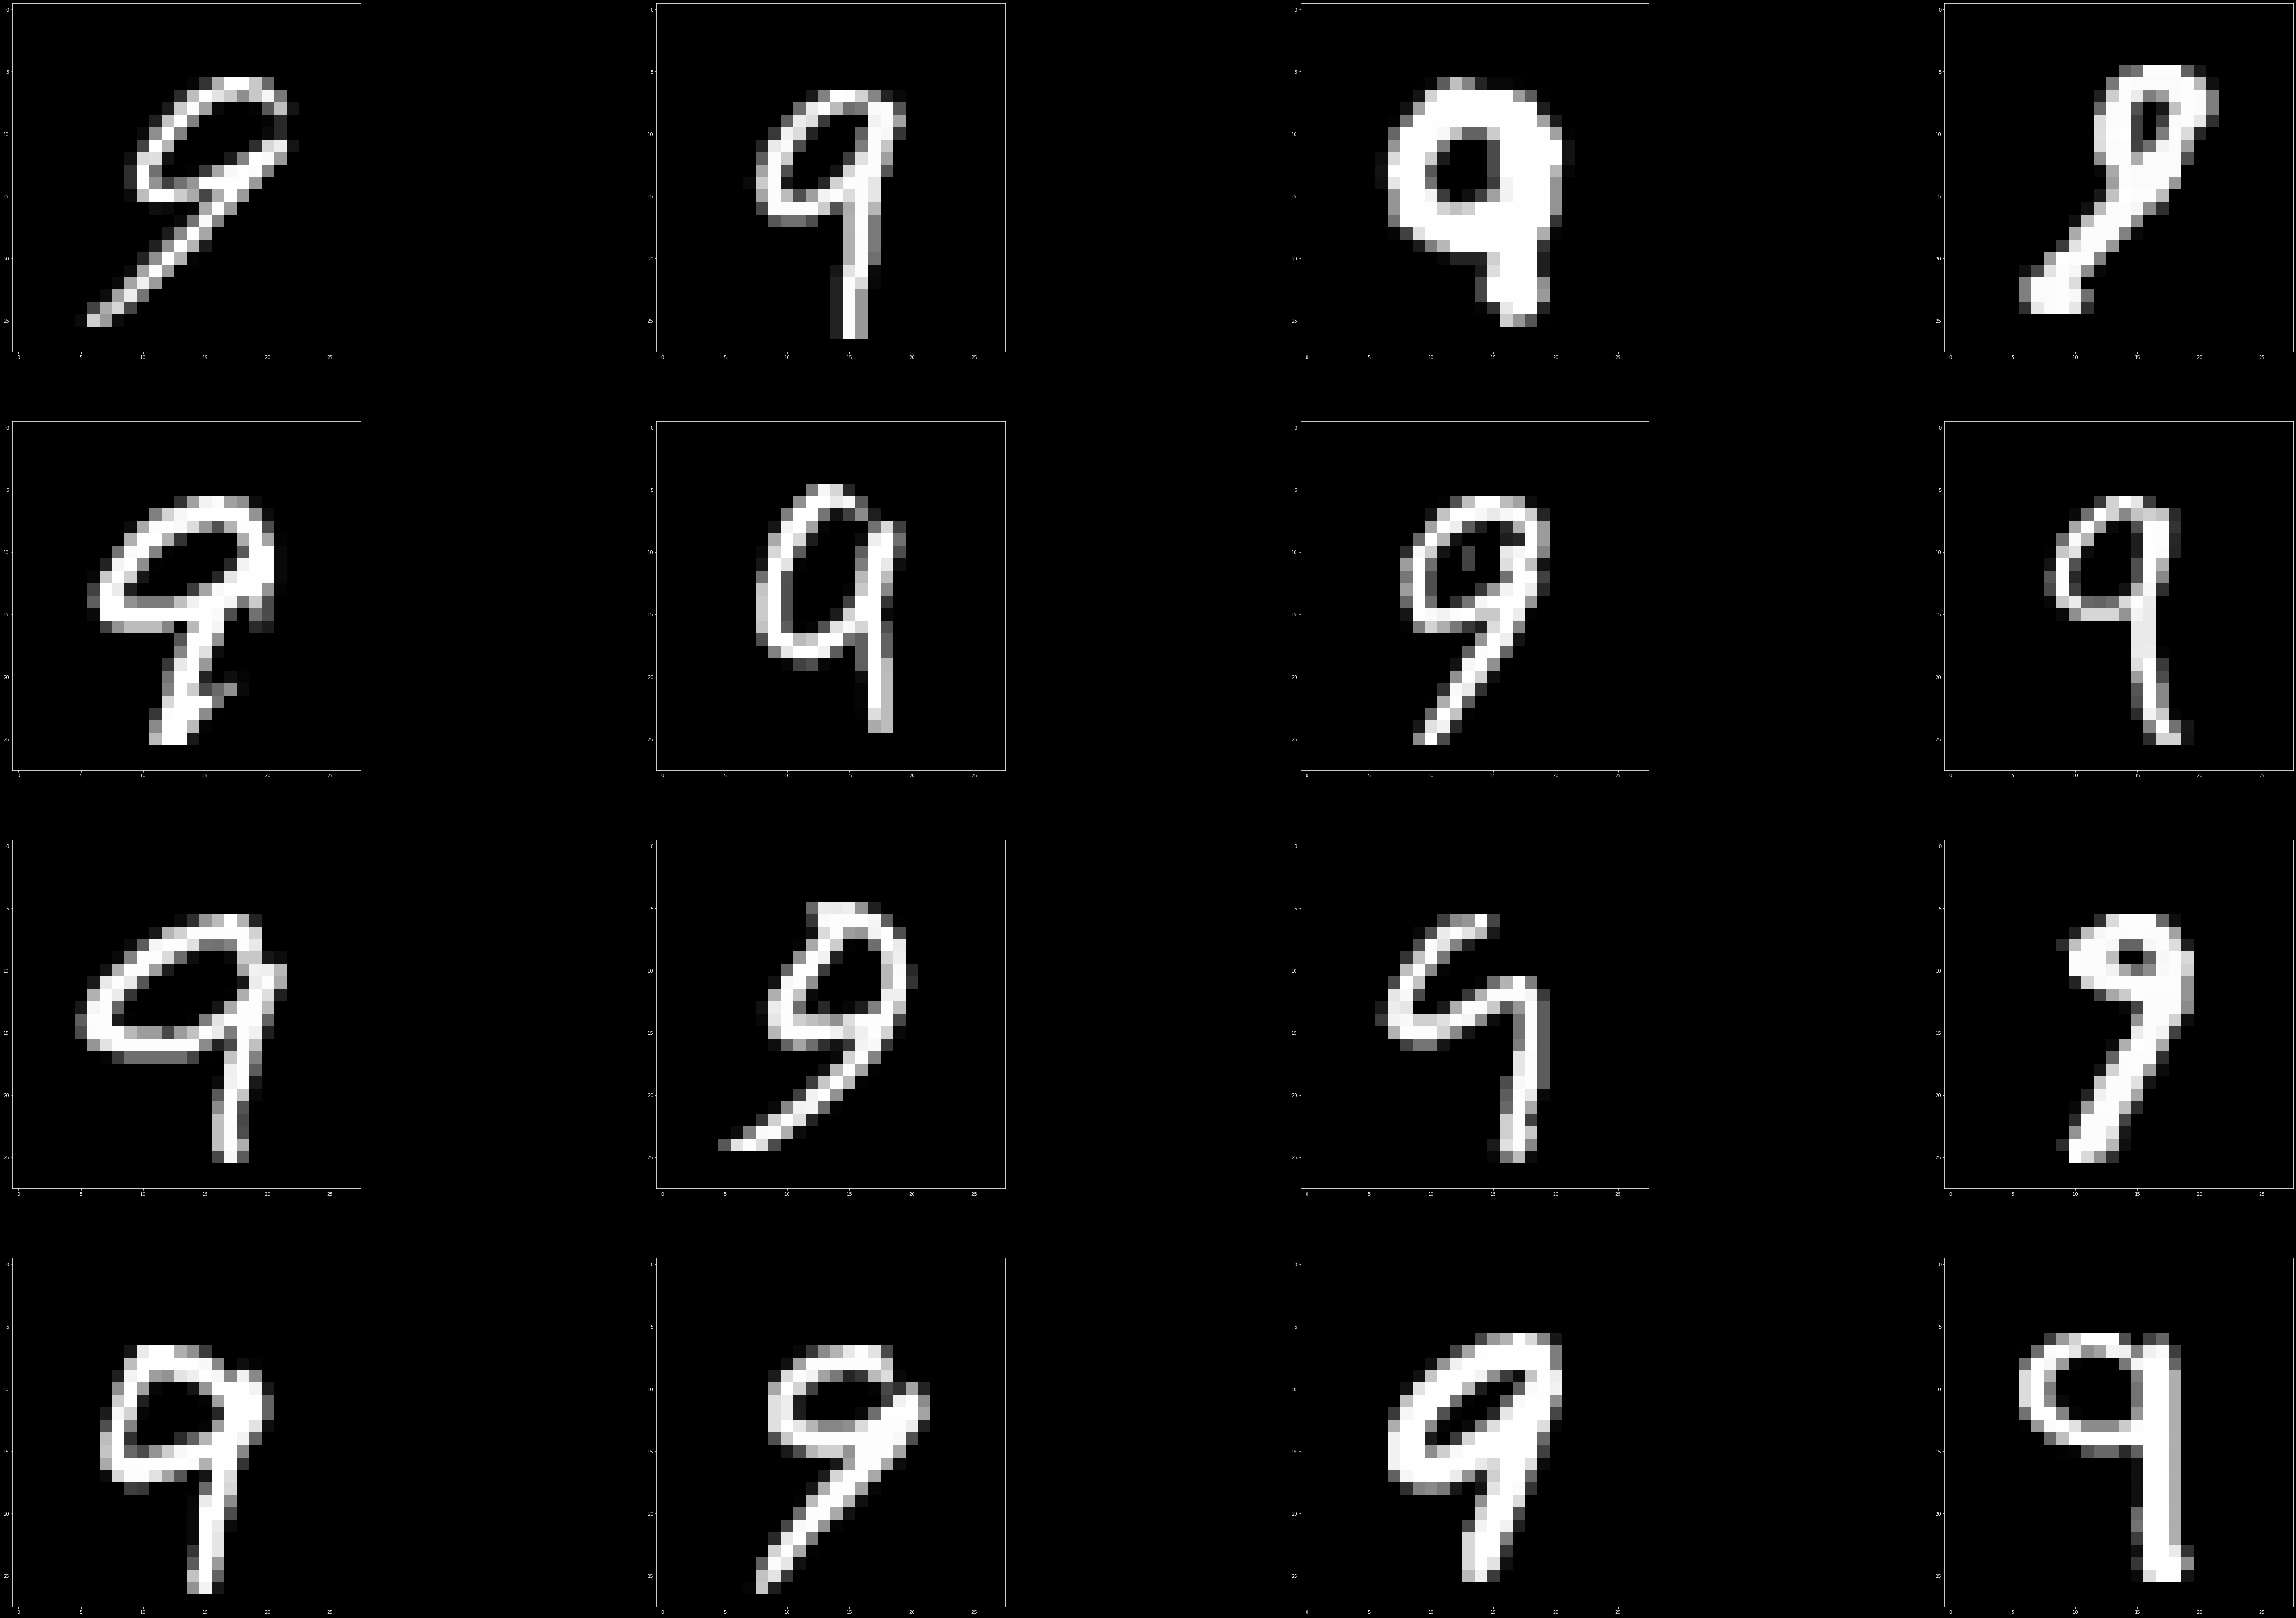

In [38]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    fig = plt.figure()
    for n, image in enumerate(images):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()


i = 0
imgs = []
for l,v in data_train.iterrows():
        if v[0]==7:
                ar = v.as_matrix()[1:]
                ar = np.reshape(np.array(ar),(28,28))
                imgs.append(ar)
                i = i + 1
        if i == 16:
                break

show_images(imgs,cols=4)

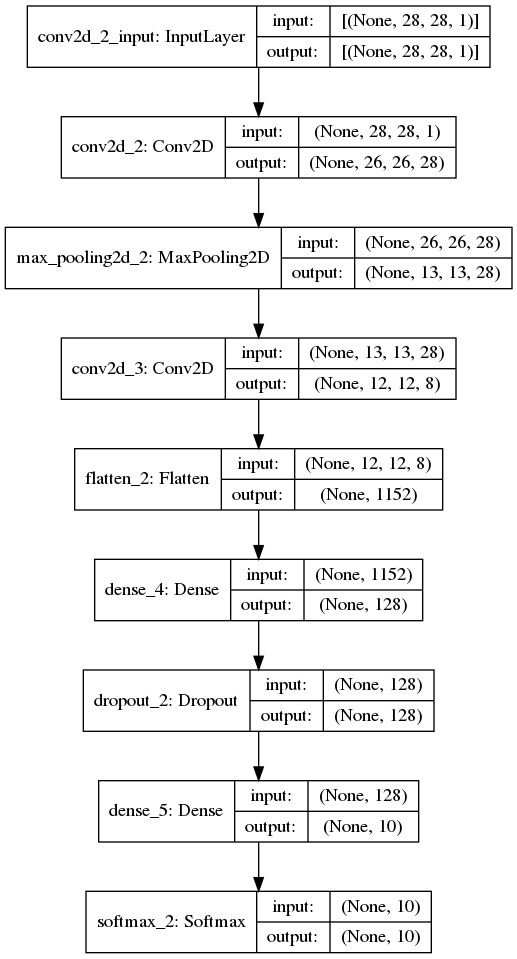

In [12]:
model = Sequential()
model.add(Conv2D(28,3,input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(8,2))
# model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Softmax())
model.compile("Adam",loss="categorical_crossentropy",metrics=["accuracy"])
plot_model(model, to_file='model.png',show_shapes=True)

In [9]:
x_train = np.array([vec for vec in vectorize(data_train,label=True)])
y_train = np.array([vec for vec in labels(data_train)])
x_val = np.array([vec for vec in vectorize(data_val,label=True)])
y_val = np.array([vec for vec in labels(data_val)])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [13]:
begin = 0
last = 5
model.fit(x=x_train,y=y_train,epochs=last,verbose=2,validation_data=(x_val,y_val),use_multiprocessing=True,initial_epoch=begin)

Train on 29399 samples, validate on 12601 samples
Epoch 1/5
29399/29399 - 14s - loss: 2.3779 - acc: 0.8875 - val_loss: 0.6990 - val_acc: 0.9432
Epoch 2/5
29399/29399 - 14s - loss: 0.5754 - acc: 0.9465 - val_loss: 0.6603 - val_acc: 0.9411
Epoch 3/5
29399/29399 - 14s - loss: 0.3893 - acc: 0.9536 - val_loss: 0.4120 - val_acc: 0.9606
Epoch 4/5
29399/29399 - 14s - loss: 0.2661 - acc: 0.9592 - val_loss: 0.3522 - val_acc: 0.9556
Epoch 5/5
29399/29399 - 15s - loss: 0.2073 - acc: 0.9640 - val_loss: 0.3446 - val_acc: 0.9489


In [ ]:
model.save("modelfile")

In [14]:
test_data = pd.read_csv("test.csv")
x_test = np.array([vec for vec in vectorize(test_data,label=False)])
preds = model.predict_classes(x=x_test)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


KeyboardInterrupt: 

In [15]:
ids = [i for i in range(1,len(preds)+1)]
df = pd.DataFrame({"id":ids,"label":preds})
df.to_csv("testvals.csv",index=False)

NameError: name 'preds' is not defined